## CREDIT CARD FRAUD DETECTION
### CODSOFT TASK

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [2]:
df_train = pd.read_csv('/home/vs/Downloads/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df_test = pd.read_csv('/home/vs/Downloads/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
df_combined = pd.concat([df_train, df_test],  axis = 0)
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


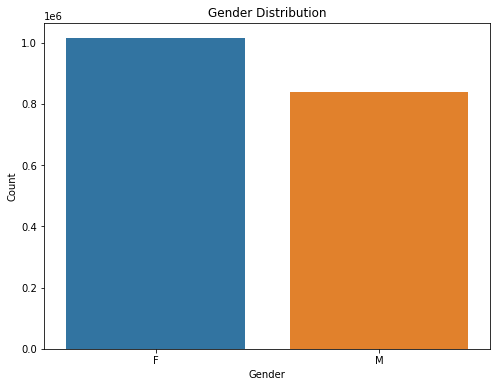

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_combined)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

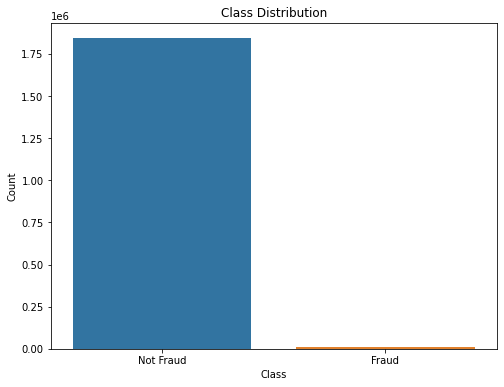

In [8]:
# Countplot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_combined)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

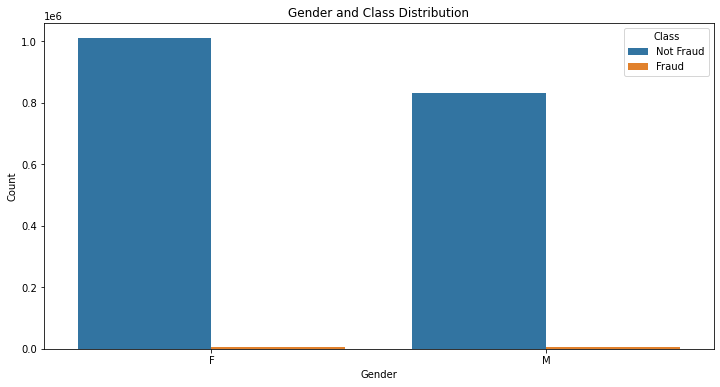

In [9]:
# Combined countplot for gender and class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='is_fraud', data=df_combined)
plt.title('Gender and Class Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()

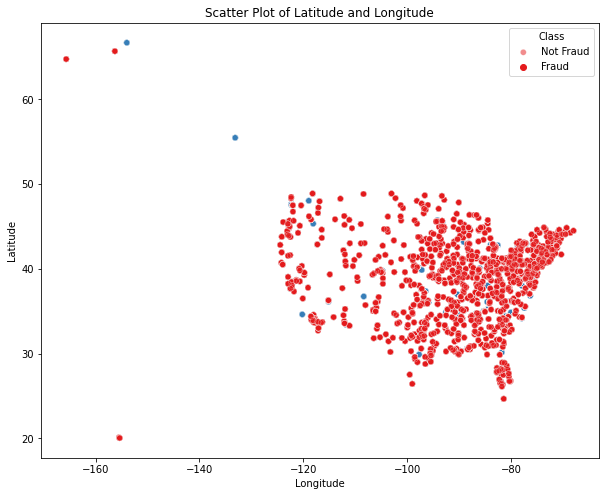

In [10]:
# Scatter plot of latitude and longitude with color coded classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_combined, x='long', y='lat', hue='is_fraud', palette='Set1', alpha=0.5)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()

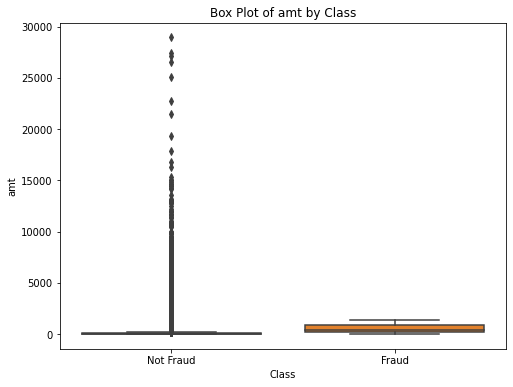

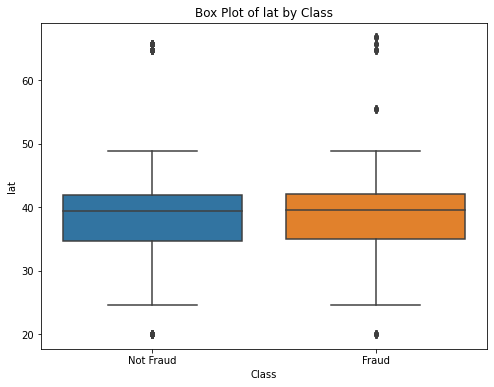

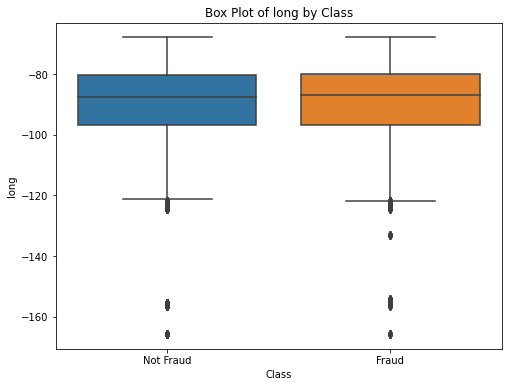

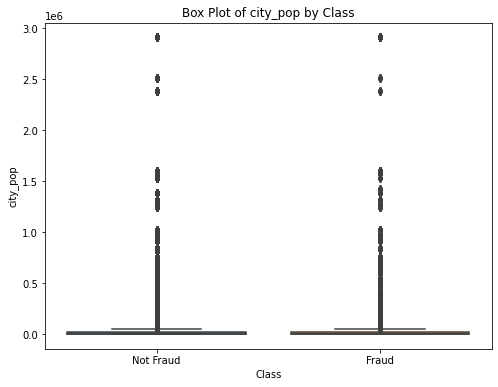

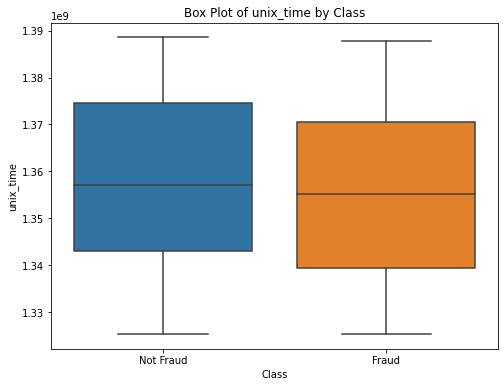

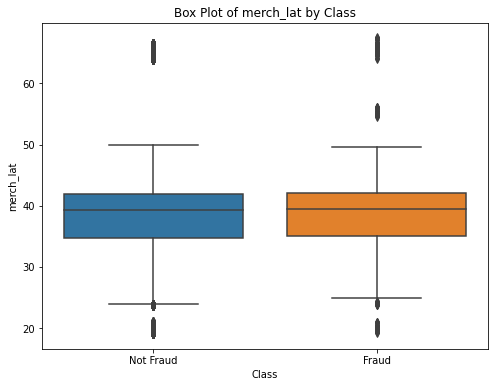

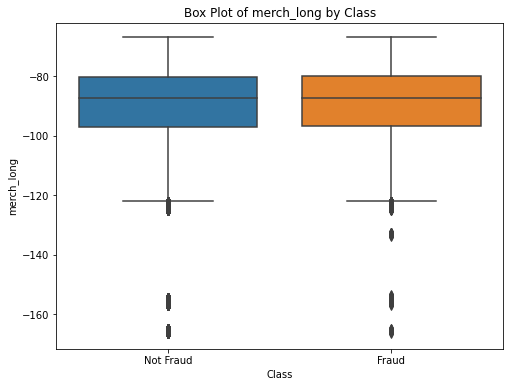

In [11]:
# Select numeric features for box plots
numeric_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Create box plots for numeric features by class
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_fraud', y=feature, data=df_combined)
    plt.title(f'Box Plot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
    plt.show()

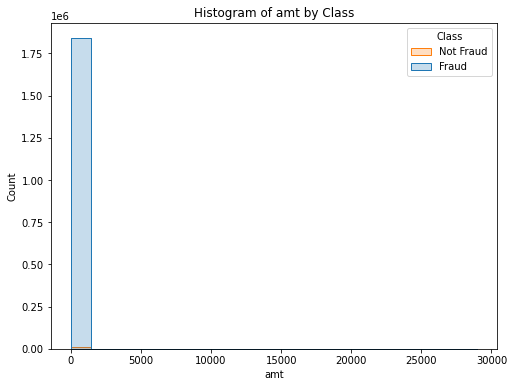

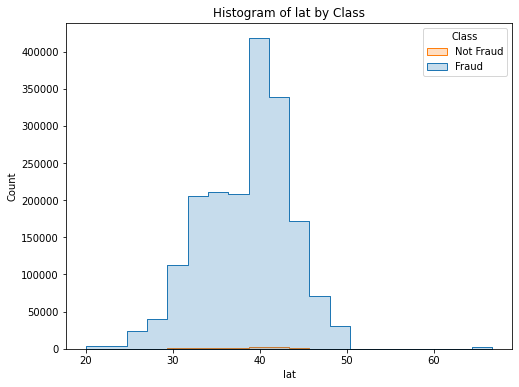

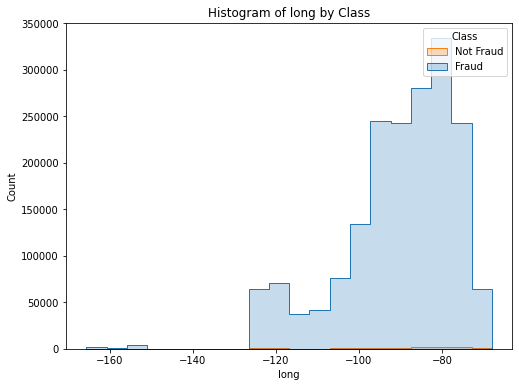

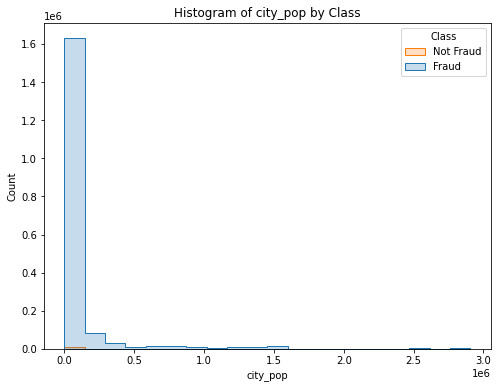

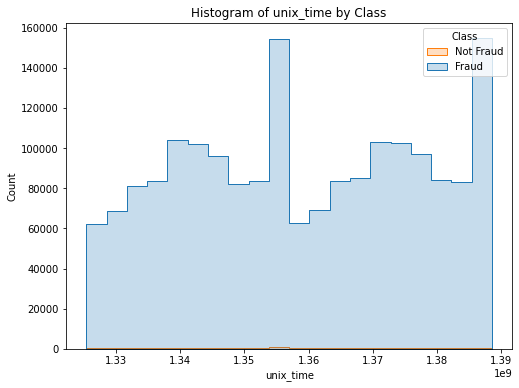

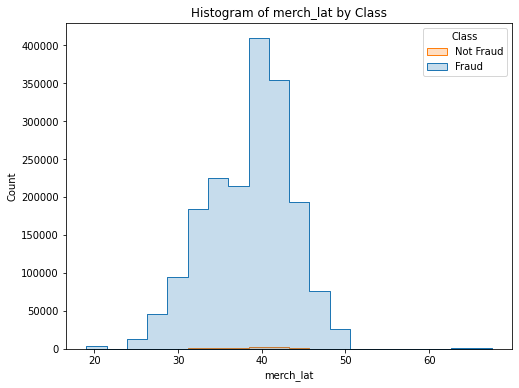

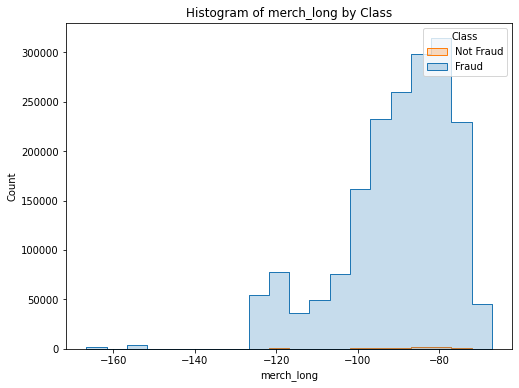

In [12]:
# Create histograms of numeric features by class
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_combined, x=feature, hue='is_fraud', element='step', bins=20, common_norm=False)
    plt.title(f'Histogram of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
    plt.show()

In [13]:
# Separate features and target variable
X = df_combined.drop('is_fraud', axis=1)
y = df_combined['is_fraud']

In [14]:
# Encode categorical columns using OrdinalEncoder
columns_to_encode = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
                     'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[columns_to_encode] = encoder.fit_transform(X[columns_to_encode])

In [15]:
# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Apply NearMiss for under-sampling
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

In [18]:
# Create and train a Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_resampled, y_resampled)

LogisticRegression()

In [19]:
# Predictions on the test set
logreg_predictions = logreg_classifier.predict(X_test)

In [20]:
# Calculate and print training and testing accuracies for Logistic Regression
logreg_train_accuracy = accuracy_score(y_resampled, logreg_classifier.predict(X_resampled))
logreg_test_accuracy = accuracy_score(y_test, logreg_predictions)

print("Logistic Regression Model:")
print(f"Training Accuracy: {logreg_train_accuracy:.2f}")
print(f"Testing Accuracy: {logreg_test_accuracy:.2f}")

# Classification report for Logistic Regression
logreg_report = classification_report(y_test, logreg_predictions)
print("\nClassification Report for Logistic Regression:")
print(logreg_report)

Logistic Regression Model:
Training Accuracy: 0.81
Testing Accuracy: 0.80

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    368526
           1       0.02      0.76      0.04      1953

    accuracy                           0.80    370479
   macro avg       0.51      0.78      0.46    370479
weighted avg       0.99      0.80      0.88    370479



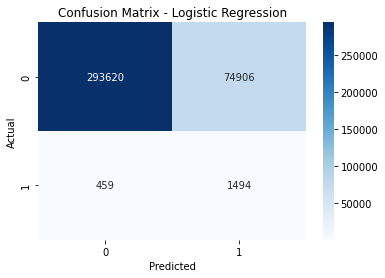

In [21]:
# Confusion matrix heatmap for Logistic Regression
sns.heatmap(confusion_matrix(y_test, logreg_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

In [24]:
# Calculate and print training and testing accuracies for Random Forest
rf_train_accuracy = accuracy_score(y_resampled, rf_classifier.predict(X_resampled))
rf_test_accuracy = accuracy_score(y_test, rf_predictions)

print("\nRandom Forest Model:")
print(f"Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Testing Accuracy: {rf_test_accuracy:.2f}")

# Classification report for Random Forest
rf_report = classification_report(y_test, rf_predictions)
print("\nClassification Report for Random Forest:")
print(rf_report)


Random Forest Model:
Training Accuracy: 1.00
Testing Accuracy: 0.90

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    368526
           1       0.05      0.96      0.09      1953

    accuracy                           0.90    370479
   macro avg       0.52      0.93      0.52    370479
weighted avg       0.99      0.90      0.94    370479



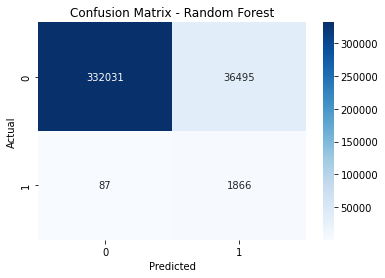

In [25]:
# Confusion matrix heatmap for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

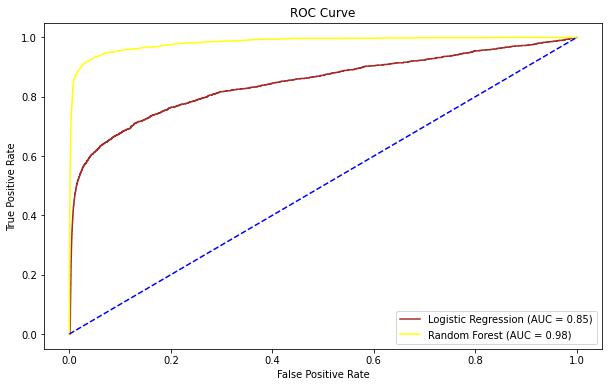

In [26]:
# ROC Curve for Logistic Regression
logreg_probabilities = logreg_classifier.predict_proba(X_test)[:,1]
logreg_roc_auc = roc_auc_score(y_test, logreg_probabilities)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probabilities)

# ROC Curve for Random Forest
rf_probabilities = rf_classifier.predict_proba(X_test)[:,1]
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='brown', label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


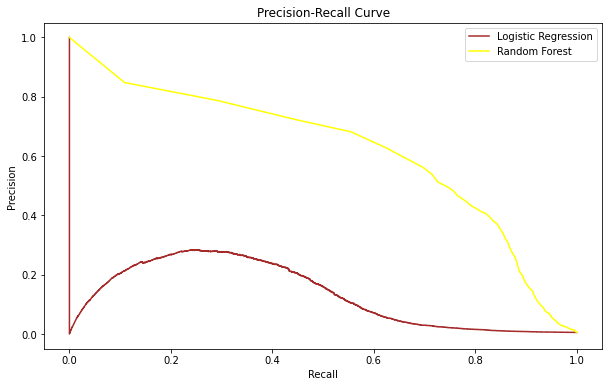

In [27]:
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probabilities)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probabilities)

plt.figure(figsize=(10, 6))
plt.plot(logreg_recall, logreg_precision, color='brown', label='Logistic Regression')
plt.plot(rf_recall, rf_precision, color='yellow', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()